# Usuarios en la cicloruta

Por: Juliana Bermúdez y Sofía Duarte

## Librerías

In [ ]:
!pip install transformers datasets torchvision torchaudio torch accelerate opencv-python
!pip install -U huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
from torchvision import models
import torch.nn as nn
from torch.utils.data import Dataset
from PIL import Image
import os
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
import cv2
import numpy as np
from glob import glob
import torchvision.transforms as T
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# img_dir = '/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/data/images/'
img_dir = '/content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/data/images/'

## Segmentación

Primero, prueba con el normalito sin haber hecho fine-tunning.


image 1/1 /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/data/images/train/cicloruta1.jpeg: 640x480 3 cars, 1 bench, 11.6ms
Speed: 2.9ms preprocess, 11.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 480)


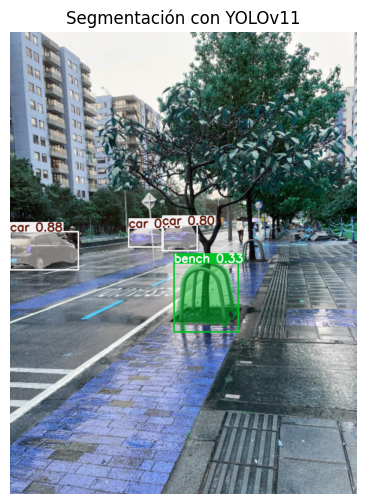

In [ ]:
# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model

# Predict with the model
results = model(img_dir + "train/cicloruta1.jpeg")[0]  # predict on an image

# Obtener la imagen original con anotaciones
annotated_img = results.plot()  # dibuja máscaras y bounding boxes

# Mostrar imagen anotada
plt.figure(figsize=(10, 6))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("Segmentación con YOLOv11")
plt.show()

Bastante malito para nuestros propósitos. Vemos la estructura para definir cuantas capas re-entrenar.

In [ ]:
model.info()

## Fine-tuning

In [ ]:
# Load pre-trained segmentation model
model = YOLO("yolo11n-seg.pt")

# torch_model = model.model

# # Freeze everything first
# for param in torch_model.parameters():
#     param.requires_grad = False

# Unfreeze the last 2 layers in torch_model.model
# for name, module in list(torch_model.model.named_children())[-5:]:
#     print(f"Unfreezing module: {name}")
#     for param in module.parameters():
#         param.requires_grad = True


# Fine-tune
src = "/content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/"
# model.train(data="/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/src/data.yaml", epochs=50, imgsz=640, batch=8)
model.train(data=src+"data2.yaml", epochs=50, imgsz=640, batch=8, project=src, name="yolo11n-seg-finetuned")



Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/data2.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11n-seg-finetuned2, nbs=64, nms=False, opset=Non

  4%|▍         | 29.5k/755k [00:00<00:00, 25.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n-seg summary: 203 layers, 2,842,803 parameters, 2,842,787 gradients, 10.4 GFLOPs

Transferred 510/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.5±0.2 MB/s, size: 436.3 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1df_B_rCqgSrYdJsPBh4nO8l0rqZv0N1X/Parcial 3/data/labels/train... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

train: New cache created: /content/drive/.shortcut-targets-by-id/1df_B_rCqgSrYdJsPBh4nO8l0rqZv0N1X/Parcial 3/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.4 ms, read: 0.4±0.1 MB/s, size: 364.4 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1df_B_rCqgSrYdJsPBh4nO8l0rqZv0N1X/Parcial 3/data/labels/val... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1df_B_rCqgSrYdJsPBh4nO8l0rqZv0N1X/Parcial 3/data/labels/val.cache


Plotting labels to /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.48G      1.898      5.006      3.167        1.8         43        640: 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          6         20    0.00333        0.3      0.015    0.00386    0.00111        0.1     0.0009   0.000285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.49G      1.548      4.718      3.254      1.689         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          6         20    0.00333        0.3     0.0114    0.00278    0.00111        0.1    0.00126   0.000362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.49G       1.78      4.985      3.217      1.819         54        640: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          6         20    0.00389       0.35     0.0158    0.00495    0.00167       0.15    0.00173    0.00074



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.52G      1.411      3.653      3.068      1.473         36        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          6         20    0.00389       0.35     0.0659     0.0434    0.00389       0.35     0.0659     0.0403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.54G      1.096       2.93      2.813      1.245         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all          6         20    0.00389       0.35       0.12     0.0906    0.00389       0.35       0.12     0.0927

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.54G      1.026      2.638      2.735      1.153         40        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          6         20    0.00389       0.35      0.183      0.134    0.00389       0.35      0.183      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.54G     0.9587      1.924      2.674      1.153         37        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all          6         20    0.00389       0.35      0.268      0.219    0.00389       0.35      0.268      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.54G     0.9724      1.796      2.574      1.082         32        640: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          6         20    0.00389       0.35      0.268      0.236    0.00389       0.35      0.268      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.54G     0.8397      1.563      2.408      1.001         39        640: 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          6         20    0.00389       0.35      0.297      0.261    0.00389       0.35      0.298      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.54G     0.9501      1.777      2.456      1.062         48        640: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all          6         20    0.00389       0.35      0.298      0.254    0.00389       0.35      0.303      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.55G     0.8655      1.737      2.339       1.04         30        640: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          6         20    0.00444        0.4      0.297      0.207    0.00444        0.4      0.297      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.57G     0.9453      1.557      2.429      1.004         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          6         20    0.00444        0.4      0.297      0.207    0.00444        0.4      0.297      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.58G     0.8924      1.594      2.338      1.074         31        640: 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all          6         20      0.005       0.45      0.298      0.248    0.00444        0.4      0.298      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.6G     0.8478      1.485      2.198      1.036         55        640: 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          6         20      0.005       0.45      0.306      0.273    0.00444        0.4      0.304      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.61G      1.047      1.691      2.173      1.023         60        640: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all          6         20      0.005       0.45      0.306      0.273    0.00444        0.4      0.304      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.63G      0.989      1.616       2.08      1.031         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          6         20    0.00556        0.5      0.288      0.242    0.00611       0.55      0.289      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.64G      1.046      1.674      2.114      1.086         34        640: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all          6         20    0.00556        0.5      0.282      0.234    0.00611       0.55      0.283       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.66G      0.941      1.458      1.928      1.044         35        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all          6         20    0.00556        0.5      0.282      0.234    0.00611       0.55      0.283       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.66G      1.079      1.425      1.968      1.054         40        640: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          6         20    0.00556        0.5      0.324      0.283    0.00611       0.55      0.325      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.66G     0.9424      1.353      1.837      1.031         35        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          6         20    0.00556        0.5      0.324      0.283    0.00611       0.55      0.325      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.66G     0.8253      1.236      1.699     0.9494         47        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          6         20    0.00556        0.5      0.347      0.321    0.00611       0.55      0.343      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.66G      0.762     0.9887       1.62      1.033         30        640: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          6         20    0.00556        0.5      0.347      0.321    0.00611       0.55      0.343      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.66G     0.9235      1.494      1.647      1.014         41        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all          6         20    0.00611       0.55      0.348      0.304    0.00611       0.55      0.337      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.66G     0.7584      1.141      1.526     0.9749         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          6         20    0.00611       0.55      0.348      0.304    0.00611       0.55      0.337      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.66G     0.8191       1.22      1.649     0.9771         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all          6         20    0.00556        0.5      0.363      0.313    0.00611       0.55      0.364      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.66G      0.792      1.314      1.485      0.949         40        640: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          6         20    0.00556        0.5      0.363      0.313    0.00611       0.55      0.364      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.66G     0.9089      1.303      1.486     0.9586         36        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


                   all          6         20    0.00556        0.5      0.363      0.313    0.00611       0.55      0.364      0.283

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.66G     0.8562      1.136      1.422     0.9747         39        640: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          6         20          1      0.132      0.357      0.299          1      0.132      0.358      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.66G       0.82      1.345      1.422     0.9651         33        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


                   all          6         20          1      0.132      0.357      0.299          1      0.132      0.358      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.66G     0.7544     0.8819      1.369     0.9616         29        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all          6         20          1      0.281      0.353      0.307          1      0.281      0.349      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.66G     0.7176      1.037      1.374     0.9507         25        640: 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all          6         20          1      0.281      0.353      0.307          1      0.281      0.349      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.66G     0.8621      1.338      1.271     0.9577         46        640: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all          6         20          1      0.281      0.353      0.307          1      0.281      0.349      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.66G      0.864      1.171      1.281     0.9783         53        640: 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all          6         20      0.927        0.3      0.336      0.309      0.927        0.3      0.338      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.66G     0.8342       1.23       1.27      0.963         52        640: 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all          6         20      0.927        0.3      0.336      0.309      0.927        0.3      0.338      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.66G     0.8216      1.255      1.268     0.9587         32        640: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all          6         20      0.927        0.3      0.336      0.309      0.927        0.3      0.338      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.66G     0.6939     0.7847      1.271     0.9398         33        640: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          6         20      0.668      0.303      0.318      0.274      0.668      0.303      0.319      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.66G     0.8036      1.076      1.204      1.016         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all          6         20      0.668      0.303      0.318      0.274      0.668      0.303      0.319      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.66G     0.7889     0.8793      1.192     0.9457         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all          6         20      0.668      0.303      0.318      0.274      0.668      0.303      0.319      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.66G     0.8373     0.9914      1.303       1.02         42        640: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all          6         20      0.873      0.344      0.342      0.301      0.873      0.344      0.342      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.66G      0.667      1.028      1.097     0.9094         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all          6         20      0.873      0.344      0.342      0.301      0.873      0.344      0.342      0.309


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.66G     0.9057      1.918      1.901       1.02         21        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all          6         20      0.873      0.344      0.342      0.301      0.873      0.344      0.342      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.66G     0.8057      1.421      1.978      1.028         11        640: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all          6         20      0.764       0.35      0.337      0.308      0.764       0.35      0.338      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.66G     0.8442      1.344      1.832      1.051         21        640: 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          6         20      0.764       0.35      0.337      0.308      0.764       0.35      0.338      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.66G     0.7584      1.089      1.527     0.9168         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all          6         20      0.764       0.35      0.337      0.308      0.764       0.35      0.338      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.66G     0.8477      1.406      1.622     0.9702         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          6         20      0.764       0.35      0.337      0.308      0.764       0.35      0.338      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.66G     0.7888      1.289      1.593     0.9517         25        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          6         20          1      0.346      0.351      0.326          1      0.346      0.351      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.66G     0.8446      1.352      1.603     0.9488         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          6         20          1      0.346      0.351      0.326          1      0.346      0.351      0.321

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.66G     0.7012      1.241      1.588     0.8571         21        640: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all          6         20          1      0.346      0.351      0.326          1      0.346      0.351      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.67G     0.7469      1.031      1.601     0.9436         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          6         20          1      0.346      0.351      0.326          1      0.346      0.351      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.68G     0.7484      1.112      1.661     0.9693         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          6         20          1      0.349      0.361      0.332          1      0.349      0.362      0.327



50 epochs completed in 0.020 hours.
Optimizer stripped from /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2/weights/last.pt, 6.0MB
Optimizer stripped from /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2/weights/best.pt, 6.0MB

Validating /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


                   all          6         20          1      0.349      0.361      0.332          1      0.349      0.362      0.327
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad0a062ddd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# metrics = model.val(data="/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/src/data.yaml", imgsz=640, split='val')
metrics = model.val(data=src+"data2.yaml", imgsz=640, split='val')

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 121.9±28.8 MB/s, size: 332.6 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1df_B_rCqgSrYdJsPBh4nO8l0rqZv0N1X/Parcial 3/data/labels/val.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


                   all          6         20          1      0.349      0.361      0.332          1      0.349      0.362      0.326
Speed: 0.3ms preprocess, 45.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned23


In [ ]:
metrics

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad0f3fc8c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
#model = YOLO("/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/src/yolo11n-seg-finetuned2/weights/best.pt")
# results = model("/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/data/images/train/cicloruta14.jpg", conf=0.1)[0]
model = YOLO(src+"yolo11n-seg-finetuned2/weights/best.pt")
results = model(img_dir+"train/cicloruta14.jpg", conf=0.1)[0]


image 1/1 /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/data/images/train/cicloruta14.jpg: 640x480 1 Ciclovia, 18.4ms
Speed: 4.4ms preprocess, 18.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
print("Segmentation mAP@0.5:", metrics.seg.map50)
print("Segmentation mAP@0.5:0.95:", metrics.seg.map)

Segmentation mAP@0.5: 0.36195454158506984
Segmentation mAP@0.5:0.95: 0.32647728209697036


In [ ]:
annotated_img = results.plot()

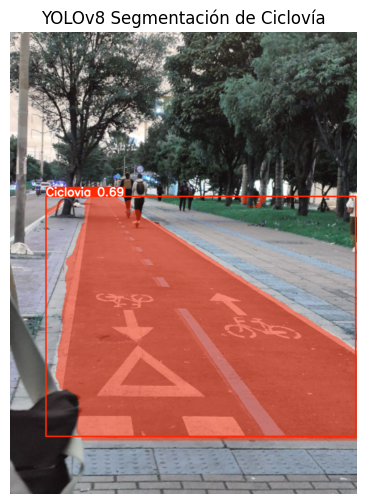

In [ ]:
# Display
plt.figure(figsize=(10, 6))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("YOLOv8 Segmentación de Ciclovía")
plt.show()

## Detección con YoLo

Probamos el modelo de detección de YOLO.


image 1/1 /content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/data/images/train/cicloruta20.jpg: 640x480 10 persons, 1 bicycle, 2 backpacks, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


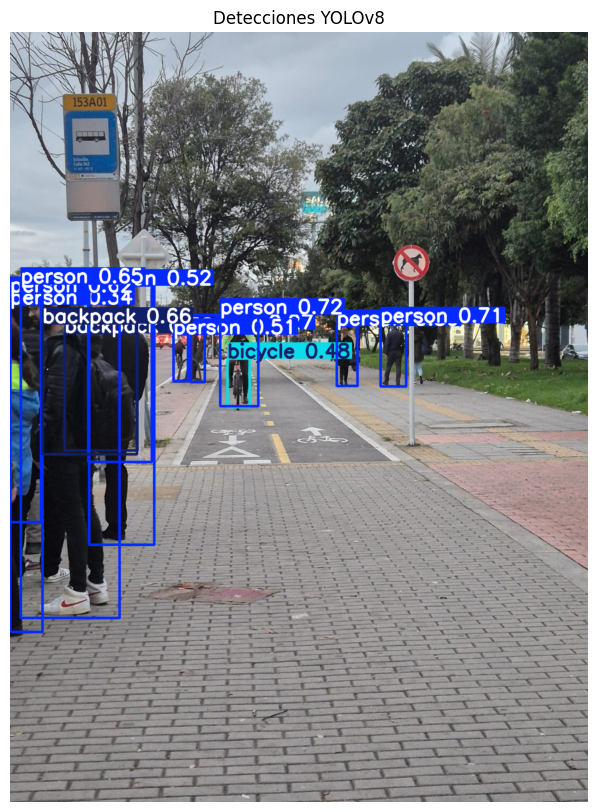

In [ ]:
# Cargar modelo YOLOv8n
model_de = YOLO('yolo11n.pt')

# Cargar imagen y hacer predicción
# Uso esta porque hay tanto ciclistas como peatones
# results = model_de('/content/drive/MyDrive/UNIVERSIDAD/Parcial 3/data/images/train/cicloruta14.jpg')
results = model_de(img_dir+'/train/cicloruta20.jpg')

# Mostrar resultados
for r in results:
    im_array = r.plot()
    im_rgb = im_array[..., ::-1]  # Convertir a RGB para matplotlib

    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.title("Detecciones YOLOv8")
    plt.show()

Identifica muy bien las personas y las bicicletas, que nos sirve. No creemos necesario hacer fine-tunning.

## Superposición del modelo

Ahora, queremos tomar los resultados de la segmentación y unirlos con los de detección. Nuestro objetivo es que si se detecta una persona en el segmento de cicloruta se identifique que hay peatones donde no deberían.

In [ ]:
def check_person_in_bike_lane(img_path, bike_lane_model, person_model,
                               bike_lane_class_id=0, person_class_id=0, bicycle_class_id=1,
                               conf=0.1):
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise ValueError(f"Could not read image at {img_path}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Segmentación de ciclorutas
    bike_result = bike_lane_model(img_rgb, conf=conf)[0]

    # Detección de personas y bicicletas
    detection_result = person_model(img_rgb)[0]

    if bike_result.masks is None or bike_result.boxes is None:
        print("No bike lanes detected.")
        return False

    masks = bike_result.masks.data.cpu().numpy()
    classes = bike_result.boxes.cls.cpu().numpy()
    mask_shape = img_rgb.shape[:2]

    # Combinar todas las máscaras de cicloruta
    bike_lane_mask = np.zeros(mask_shape, dtype=np.uint8)
    for i, cls_id in enumerate(classes):
        if int(cls_id) == bike_lane_class_id:
            mask = (masks[i] > 0.5).astype(np.uint8)
            resized_mask = cv2.resize(mask, (mask_shape[1], mask_shape[0]), interpolation=cv2.INTER_NEAREST)
            bike_lane_mask = np.maximum(bike_lane_mask, resized_mask)

    # Extraer cajas de personas y bicicletas
    boxes = detection_result.boxes.xyxy.cpu().numpy().astype(int)
    labels = detection_result.boxes.cls.cpu().numpy().astype(int)

    person_boxes = [boxes[i] for i in range(len(labels)) if labels[i] == person_class_id]
    bicycle_boxes = [boxes[i] for i in range(len(labels)) if labels[i] == bicycle_class_id]

    # Filtrar personas que NO estén sobre bicicletas (intersección IOU)
    valid_person_boxes = []
    for p_box in person_boxes:
        discard = False
        for b_box in bicycle_boxes:
            # Calcular intersección entre la persona y la bicicleta
            xA = max(p_box[0], b_box[0])
            yA = max(p_box[1], b_box[1])
            xB = min(p_box[2], b_box[2])
            yB = min(p_box[3], b_box[3])
            inter_area = max(0, xB - xA) * max(0, yB - yA)

            p_area = (p_box[2] - p_box[0]) * (p_box[3] - p_box[1])
            if inter_area / p_area > 0.2:
                discard = True
                break
        if not discard:
            valid_person_boxes.append(p_box)

    detected = False
    # Verificar si las personas válidas pisan la cicloruta
    for box in valid_person_boxes:
        x1, y1, x2, y2 = box
        # Solo tomamos la parte inferior (pies)
        feet_box = (x1, y2 - int(0.2 * (y2 - y1)), x2, y2)
        person_mask = np.zeros_like(bike_lane_mask, dtype=np.uint8)
        person_mask[feet_box[1]:feet_box[3], feet_box[0]:feet_box[2]] = 1

        overlap = np.logical_and(bike_lane_mask, person_mask)
        if np.any(overlap):
            detected = True
            break

    # Visualización
    overlay = img_rgb.copy()
    overlay[bike_lane_mask == 1] = [255, 0, 0]  # rojo para la cicloruta
    for box in valid_person_boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)  # verde para personas

    plt.figure(figsize=(8, 8))
    plt.title("Detección de personas y ciclorutas")
    plt.imshow(overlay)
    plt.axis("off")
    plt.show()

    if detected:
        print("Person walking in bike lane detected.")
        return True
    else:
        print("No person in bike lane.")
        return False



0: 640x480 3 Ciclovias, 22.1ms
Speed: 4.7ms preprocess, 22.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 person, 19.7ms
Speed: 3.8ms preprocess, 19.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)


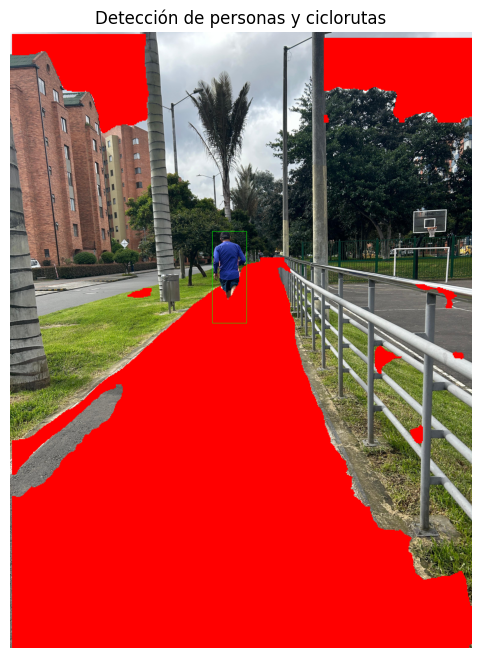

Person walking in bike lane detected.


True

In [ ]:
check_person_in_bike_lane(img_dir+"/prueba/cicloruta23.jpg", model, model_de, bike_lane_class_id=0, person_class_id=0, conf=0.1)

# Prueba con el modelo guardado

Sin ejecutar nada de lo anterior

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

bike_lane_model = YOLO("/content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/src/yolo11n-seg-finetuned2/weights/best.pt")  # use your real model path
person_model = YOLO("yolo11n.pt")
image_path = "/content/drive/MyDrive/Notas Universidad/SEMESTRE 2025-1/Intro a la visión por computadora/Proyectos/Parcial 3/data/images/train/cicloruta14.jpg"

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.7MB/s]


In [6]:
def check_person_in_bike_lane(img_path, bike_lane_model, person_model,
                               bike_lane_class_id=0, person_class_id=0, bicycle_class_id=1,
                               conf=0.1):
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise ValueError(f"Could not read image at {img_path}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Segmentación de ciclorutas
    bike_result = bike_lane_model(img_rgb, conf=conf)[0]

    # Detección de personas y bicicletas
    detection_result = person_model(img_rgb)[0]

    if bike_result.masks is None or bike_result.boxes is None:
        print("No bike lanes detected.")
        return False

    masks = bike_result.masks.data.cpu().numpy()
    classes = bike_result.boxes.cls.cpu().numpy()
    mask_shape = img_rgb.shape[:2]

    # Combinar todas las máscaras de cicloruta
    bike_lane_mask = np.zeros(mask_shape, dtype=np.uint8)
    for i, cls_id in enumerate(classes):
        if int(cls_id) == bike_lane_class_id:
            mask = (masks[i] > 0.5).astype(np.uint8)
            resized_mask = cv2.resize(mask, (mask_shape[1], mask_shape[0]), interpolation=cv2.INTER_NEAREST)
            bike_lane_mask = np.maximum(bike_lane_mask, resized_mask)

    # Extraer cajas de personas y bicicletas
    boxes = detection_result.boxes.xyxy.cpu().numpy().astype(int)
    labels = detection_result.boxes.cls.cpu().numpy().astype(int)

    person_boxes = [boxes[i] for i in range(len(labels)) if labels[i] == person_class_id]
    bicycle_boxes = [boxes[i] for i in range(len(labels)) if labels[i] == bicycle_class_id]

    # Filtrar personas que NO estén sobre bicicletas (intersección IOU)
    valid_person_boxes = []
    for p_box in person_boxes:
        discard = False
        for b_box in bicycle_boxes:
            # Calcular intersección entre la persona y la bicicleta
            xA = max(p_box[0], b_box[0])
            yA = max(p_box[1], b_box[1])
            xB = min(p_box[2], b_box[2])
            yB = min(p_box[3], b_box[3])
            inter_area = max(0, xB - xA) * max(0, yB - yA)

            p_area = (p_box[2] - p_box[0]) * (p_box[3] - p_box[1])
            if inter_area / p_area > 0.2:
                discard = True
                break
        if not discard:
            valid_person_boxes.append(p_box)

    detected = False
    # Verificar si las personas válidas pisan la cicloruta
    for box in valid_person_boxes:
        x1, y1, x2, y2 = box
        # Solo tomamos la parte inferior (pies)
        feet_box = (x1, y2 - int(0.2 * (y2 - y1)), x2, y2)
        person_mask = np.zeros_like(bike_lane_mask, dtype=np.uint8)
        person_mask[feet_box[1]:feet_box[3], feet_box[0]:feet_box[2]] = 1

        overlap = np.logical_and(bike_lane_mask, person_mask)
        if np.any(overlap):
            detected = True
            break

    # Visualización
    overlay = img_rgb.copy()
    overlay[bike_lane_mask == 1] = [255, 0, 0]  # rojo para la cicloruta
    for box in valid_person_boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)  # verde para personas

    plt.figure(figsize=(8, 8))
    plt.title("Detección de personas y ciclorutas")
    plt.imshow(overlay)
    plt.axis("off")
    plt.show()

    if detected:
        print("Person walking in bike lane detected.")
        return True
    else:
        print("No person in bike lane.")
        return False



0: 640x480 1 Ciclovia, 500.9ms
Speed: 18.8ms preprocess, 500.9ms inference, 39.2ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 5 persons, 2 cars, 291.3ms
Speed: 5.1ms preprocess, 291.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 480)


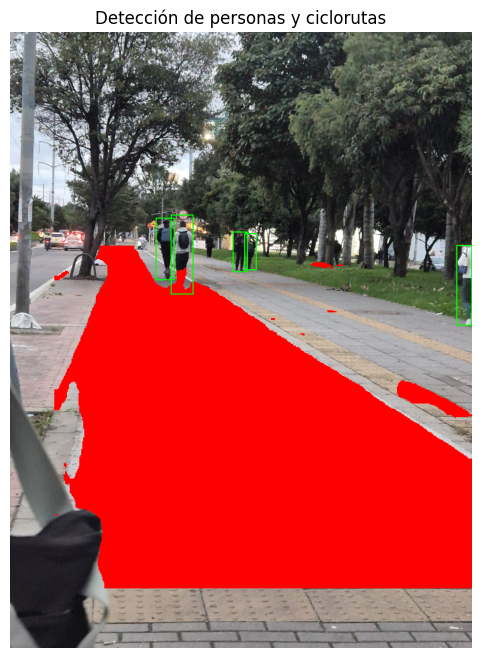

Person walking in bike lane detected.


True

In [7]:
check_person_in_bike_lane(image_path, bike_lane_model, person_model, bike_lane_class_id=0, person_class_id=0, conf=0.1)